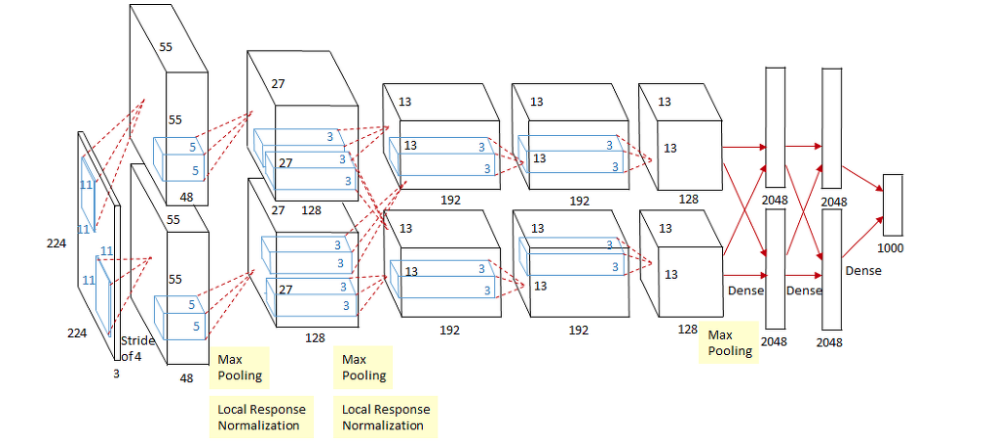

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

class AlexNet:
    @staticmethod
    def build(input_shape=(224, 224, 3), activation="relu", class_num=1000):
        model = Sequential()
        model.add(Conv2D(96, (11,11), strides=(4,4), input_shape=input_shape, activation=activation, padding='same'))
        model.add(MaxPooling2D(pool_size=(3,3), strides=2))
        model.add(BatchNormalization())

        model.add(Conv2D(256, (5, 5), activation=activation, padding='same'))
        model.add(MaxPooling2D(pool_size=(3,3), strides=2))
        model.add(BatchNormalization())

        model.add(Conv2D(384, (3,3), activation=activation, padding='same'))
        model.add(Conv2D(384, (3,3), activation=activation, padding='same'))
        model.add(Conv2D(256, (3,3), activation=activation, padding='same'))
        #더이상 Pooling 불

        model.add(Flatten())
        model.add(Dense(4096, activation=activation))
        model.add(Dropout(0.4))
        model.add(Dense(4096, activation=activation))
        model.add(Dropout(0.4))
        model.add(Dense(class_num, activation='softmax'))

        return model

In [4]:
model = AlexNet.build(input_shape=(224,224,3))
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 batch_normalization_2 (Bat  (None, 27, 27, 96)        384       
 chNormalization)                                                
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                      

In [5]:
model = AlexNet.build(input_shape=(32,32,3), class_num=10)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
from tensorflow.keras.datasets import cifar10

In [7]:
(train_X, train_y), (test_X, test_y) = cifar10.load_data()

170498071/170498071 [==============================] - 43s 0us/step


In [8]:
from tensorflow.keras.datasets import cifar10
(train_X, train_y), (test_X, test_y) = cifar10.load_data()
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), batch_size=128, epochs=20, verbose=1)

Epoch 1/20
391/391 [==============================] - 206s 524ms/step - loss: 1.6542 - accuracy: 0.3798 - val_loss: 1.6918 - val_accuracy: 0.4215
Epoch 2/20
391/391 [==============================] - 204s 522ms/step - loss: 1.3390 - accuracy: 0.5226 - val_loss: 1.5264 - val_accuracy: 0.4668
Epoch 3/20
391/391 [==============================] - 198s 507ms/step - loss: 1.1777 - accuracy: 0.5858 - val_loss: 1.3546 - val_accuracy: 0.5402
Epoch 4/20
391/391 [==============================] - 204s 522ms/step - loss: 1.0545 - accuracy: 0.6332 - val_loss: 1.6298 - val_accuracy: 0.4763
Epoch 5/20
391/391 [==============================] - 199s 509ms/step - loss: 0.9466 - accuracy: 0.6744 - val_loss: 1.2270 - val_accuracy: 0.5852
Epoch 6/20
391/391 [==============================] - 196s 502ms/step - loss: 0.8529 - accuracy: 0.7072 - val_loss: 1.4009 - val_accuracy: 0.5561
Epoch 7/20
391/391 [==============================] - 197s 504ms/step - loss: 0.7638 - accuracy: 0.7396 - val_loss: 1.4233 -

In [ ]:
loss, accuracy = model.evaluate(test_X, test_y, verbose=1)
print(f"Loss : {loss}, Accuracy : {accuracy}")